In [ ]:
# Determinar las matrices de varianza-covarianza y correlación para el 
# conjunto de datos completo, analizar las correlaciones existente entre las variables.

In [2]:
import pandas as pd

import sys
import os
from sklearn.preprocessing import StandardScaler

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.insert(0, src_dir)

from analysis.correlations import CovarianceUtils



In [3]:
covariances_utils = CovarianceUtils()

In [4]:
data_frame = pd.read_csv('../assets/HFCO2_imputed.csv')

In [14]:
data_frame

,co2_eq_emissions,downloads,likes,size,size_efficency,auto,training_type_fine-tuning,training_type_pretraining
0,149200.000000,1172830,170,3.528337e+08,2.364837e+03,False,0,1
1,133.021988,14,0,3.081921e+08,2.316851e+06,True,0,0
2,126.344463,14,1,3.083194e+08,2.440308e+06,True,0,0
3,7.989145,45,0,4.380438e+08,5.482988e+07,True,0,0
4,55.101963,43,0,4.333314e+08,7.864173e+06,True,0,0
...,...,...,...,...,...,...,...,...
1414,0.401257,0,0,1.336520e+09,3.330836e+09,True,0,0
1415,0.015786,0,0,3.100225e+08,1.963898e+10,True,0,0
1416,3.673900,0,0,3.100225e+08,8.438513e+07,True,0,0
1417,5.741513,0,0,3.100225e+08,5.399666e+07,True,0,0


In [15]:
covariances_matrix = covariances_utils.calculate_covariance_matrix(data_frame)

In [16]:
covariances_matrix

,co2_eq_emissions,downloads,likes,size,size_efficency,auto,training_type_fine-tuning,training_type_pretraining
co2_eq_emissions,4.301083e+11,1.036056e+09,5.485683e+07,6.511502e+15,-1.993498e+14,-1.651837e+04,-6.166185e+02,1.731904e+04
downloads,1.036056e+09,1.969145e+09,3.817833e+05,1.048341e+13,-2.192323e+13,-1.536929e+03,-8.272474e+01,1.652437e+03
likes,5.485683e+07,3.817833e+05,7.089867e+03,8.300188e+11,-3.075548e+10,-2.590488e+00,2.169131e-01,2.414569e+00
size,6.511502e+15,1.048341e+13,8.300188e+11,9.982039e+19,-1.233513e+18,-2.465900e+08,5.233760e+06,2.525158e+08
size_efficency,-1.993498e+14,-2.192323e+13,-3.075548e+10,-1.233513e+18,1.581027e+21,7.979759e+08,-4.938309e+08,-1.950231e+08
auto,-1.651837e+04,-1.536929e+03,-2.590488e+00,-2.465900e+08,7.979759e+08,7.863958e-02,-4.628898e-02,-1.399901e-02
training_type_fine-tuning,-6.166185e+02,-8.272474e+01,2.169131e-01,5.233760e+06,-4.938309e+08,-4.628898e-02,4.946470e-02,-9.194182e-04
training_type_pretraining,1.731904e+04,1.652437e+03,2.414569e+00,2.525158e+08,-1.950231e+08,-1.399901e-02,-9.194182e-04,1.731985e-02


In [18]:
correlation_matrix = covariances_utils.calculate_correlation_matrix(data_frame)
correlation_matrix

,co2_eq_emissions,downloads,likes,size,size_efficency,auto,training_type_fine-tuning,training_type_pretraining
co2_eq_emissions,1.000000,0.035600,0.993397,0.993763,-0.007645,-0.089817,-0.004227,0.200661
downloads,0.035600,1.000000,0.102178,0.023646,-0.012425,-0.123508,-0.008382,0.282953
likes,0.993397,0.102178,1.000000,0.986641,-0.009186,-0.109709,0.011583,0.217896
size,0.993763,0.023646,0.986641,1.000000,-0.003105,-0.088013,0.002355,0.192047
size_efficency,-0.007645,-0.012425,-0.009186,-0.003105,1.000000,0.071565,-0.055842,-0.037269
auto,-0.089817,-0.123508,-0.109709,-0.088013,0.071565,1.000000,-0.742180,-0.379319
training_type_fine-tuning,-0.004227,-0.008382,0.011583,0.002355,-0.055842,-0.742180,1.000000,-0.031412
training_type_pretraining,0.200661,0.282953,0.217896,0.192047,-0.037269,-0.379319,-0.031412,1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Estandarización de los datos
scaler = StandardScaler()
# Se ajusta y transforma el DataFrame completo
df_scaled = pd.DataFrame(scaler.fit_transform(data_frame), columns=data_frame.columns)
cov_matrix_scaled = df_scaled.cov()
corr_matrix = data_frame.corr()

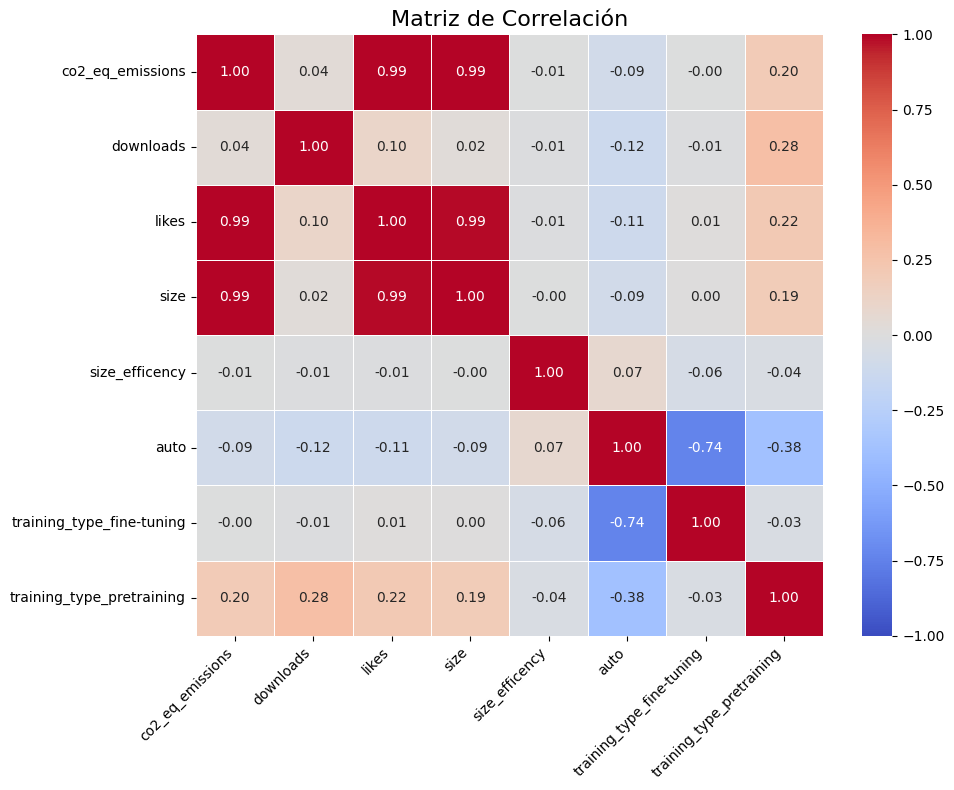

In [29]:
# Gráfico de la Matriz de Correlación
plt.figure(figsize=(10, 8)) # Ajusta el tamaño
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("matriz_correlacion_ampliada.png")
plt.show() # Muestra la segunda gráfica

In [ ]:
# gráfica de una variable contra otra CO2 Likes y Size

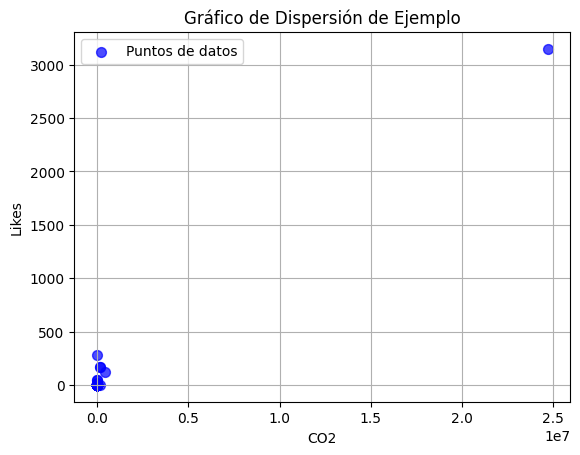

In [10]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)  # Para reproducibilidad
x =data_frame['co2_eq_emissions']
y = data_frame['likes']

plt.scatter(x, y, s=50, c='blue', alpha=0.7, label='Puntos de datos')

plt.title('Gráfico de Dispersión de Ejemplo')
plt.xlabel('CO2')
plt.ylabel('Likes')

plt.legend()

plt.grid(True)

plt.savefig('grafico_dispersion_ejemplo.png')

plt.show()

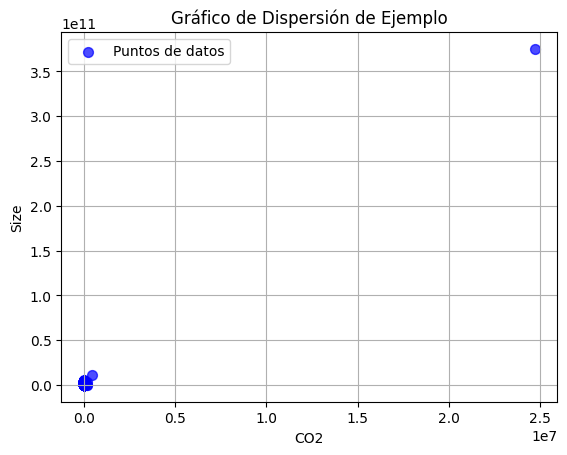

In [12]:
np.random.seed(0)  # Para reproducibilidad
x =data_frame['co2_eq_emissions']
y = data_frame['size']

plt.scatter(x, y, s=50, c='blue', alpha=0.7, label='Puntos de datos')

plt.title('Gráfico de Dispersión de Ejemplo')
plt.xlabel('CO2')
plt.ylabel('Size')

plt.legend()

plt.grid(True)

plt.savefig('grafico_dispersion_ejemplo.png')

plt.show()

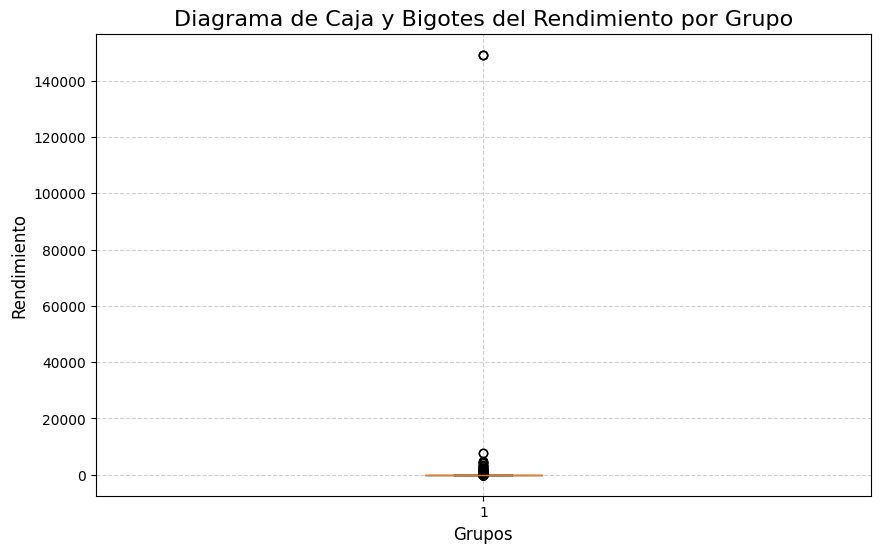

In [29]:
# Prepara los datos para el boxplot
import matplotlib.pyplot as plt

x =df3['co2_eq_emissions']
y = df3['size']



nombres_grupos = list(x.keys())

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Genera el diagrama de caja
ax.boxplot(x, patch_artist=True)

# Personaliza el gráfico
ax.set_title('Diagrama de Caja y Bigotes del Rendimiento por Grupo', fontsize=16)
ax.set_xlabel('Grupos', fontsize=12)
ax.set_ylabel('Rendimiento', fontsize=12)

# Añade una cuadrícula para mejor legibilidad
ax.grid(True, linestyle='--', alpha=0.6)

# Muestra el gráfico
plt.show()


In [18]:
data_frame[data_frame['co2_eq_emissions'].max()]

np.float64(24700000.0)

In [24]:
df2 = data_frame[data_frame['co2_eq_emissions']!= data_frame['co2_eq_emissions'].max()]

In [27]:
# df3 = df2[df2['co2_eq_emissions']!= df2['co2_eq_emissions'].max()]

In [28]:
df3

,co2_eq_emissions,downloads,likes,size,size_efficency,auto,training_type_fine-tuning,training_type_pretraining
0,149200.000000,1172830,170,3.528337e+08,2.364837e+03,False,0,1
1,133.021988,14,0,3.081921e+08,2.316851e+06,True,0,0
2,126.344463,14,1,3.083194e+08,2.440308e+06,True,0,0
3,7.989145,45,0,4.380438e+08,5.482988e+07,True,0,0
4,55.101963,43,0,4.333314e+08,7.864173e+06,True,0,0
...,...,...,...,...,...,...,...,...
1414,0.401257,0,0,1.336520e+09,3.330836e+09,True,0,0
1415,0.015786,0,0,3.100225e+08,1.963898e+10,True,0,0
1416,3.673900,0,0,3.100225e+08,8.438513e+07,True,0,0
1417,5.741513,0,0,3.100225e+08,5.399666e+07,True,0,0


/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1463/2105325753.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')


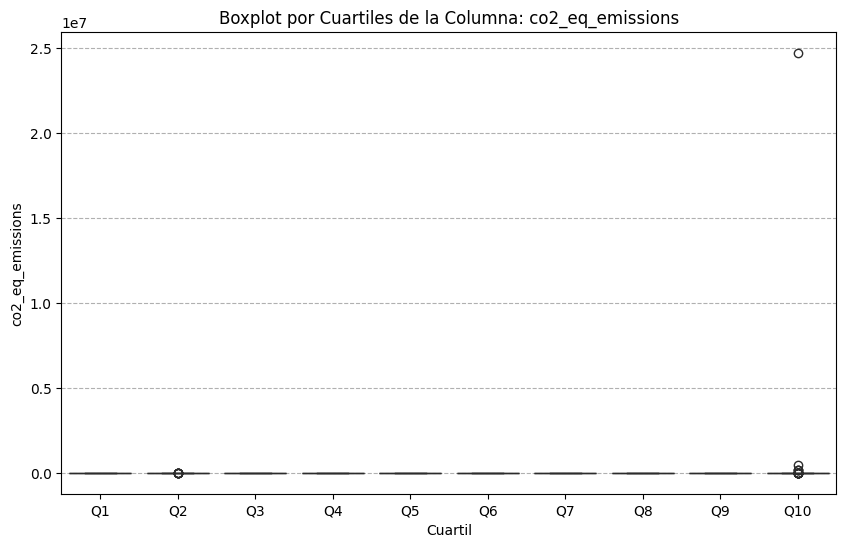

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def create_quartiles_and_boxplot(dataframe, column_name):
    """
    Divides a column into 4 quartiles and creates a boxplot.
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be analyzed.
    """
    # Create quartiles
    dataframe['quartile'] = pd.qcut(dataframe[column_name], 10, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'])
    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')
    plt.title(f'Boxplot por Cuartiles de la Columna: {column_name}')
    plt.xlabel('Cuartil')
    plt.ylabel(column_name)
    plt.grid(axis='y', linestyle='--')
    plt.savefig('quartile_boxplot.png')
    plt.show()
# Example usage with sample data
create_quartiles_and_boxplot(data_frame, 'co2_eq_emissions')

In [37]:
 quartiles = pd.qcut(data_frame['co2_eq_emissions'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [39]:
quartiles.value_counts()

co2_eq_emissions
Q1    355
Q2    355
Q4    355
Q3    354
Name: count, dtype: int64

In [40]:
df4 = df2[df2['co2_eq_emissions']!= 0]

In [42]:
df4.value_counts()

co2_eq_emissions  downloads  likes  size          size_efficency  auto   training_type_fine-tuning  training_type_pretraining
40.000000         4          0      2.329728e+09   5.824320e+07   False  1                          0                            5
0.036300          0          0      6.805208e+08  -8.350602e+08   False  0                          1                            5
17.000000         4          0      1.200790e+09   7.063468e+07   False  1                          0                            4
0.027940          9364       45     2.657435e+08   9.511226e+09   False  1                          0                            2
                  13         1      2.657435e+08   9.511226e+09   False  1                          0                            2
                                                                                                                                ..
1.191357          3          1      8.917309e+08   7.485001e+08   True   0              

/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1463/3076889894.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['quartile'] = pd.qcut(dataframe[column_name], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1463/3076889894.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')


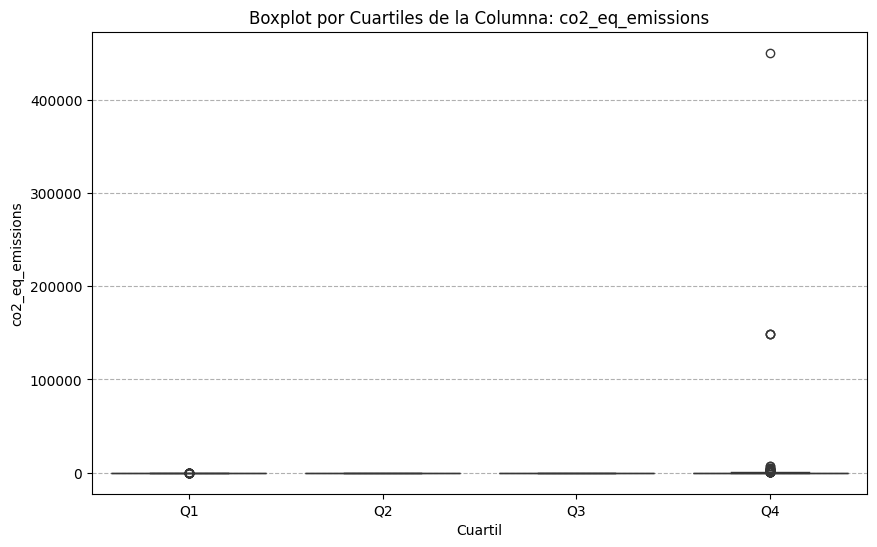

In [43]:
create_quartiles_and_boxplot(df4, 'co2_eq_emissions')

In [51]:
df4 = df2[df2['co2_eq_emissions']>= 1]

In [52]:
df4.describe()

,co2_eq_emissions,downloads,likes,size,size_efficency,training_type_fine-tuning,training_type_pretraining
count,985.000000,9.850000e+02,985.000000,9.850000e+02,9.850000e+02,985.000000,985.000000
mean,1040.077964,2.665813e+03,0.959391,1.191616e+09,9.488677e+08,0.061929,0.016244
std,16528.231775,5.303644e+04,12.390675,1.190276e+09,2.912530e+09,0.241149,0.126475
min,1.000846,0.000000e+00,0.000000,4.618747e+07,2.364837e+03,0.000000,0.000000
25%,3.115125,2.000000e+00,0.000000,4.333314e+08,2.508955e+07,0.000000,0.000000
50%,10.435358,4.000000e+00,0.000000,7.377718e+08,8.625517e+07,0.000000,0.000000
75%,40.000000,1.400000e+01,0.000000,1.340750e+09,2.910597e+08,0.000000,0.000000
max,450300.000000,1.172830e+06,279.000000,1.073742e+10,1.192863e+10,1.000000,1.000000


/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1463/2105325753.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['quartile'] = pd.qcut(dataframe[column_name], 10, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'])
/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1463/2105325753.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quartile', y=column_name, data=dataframe, palette='viridis')


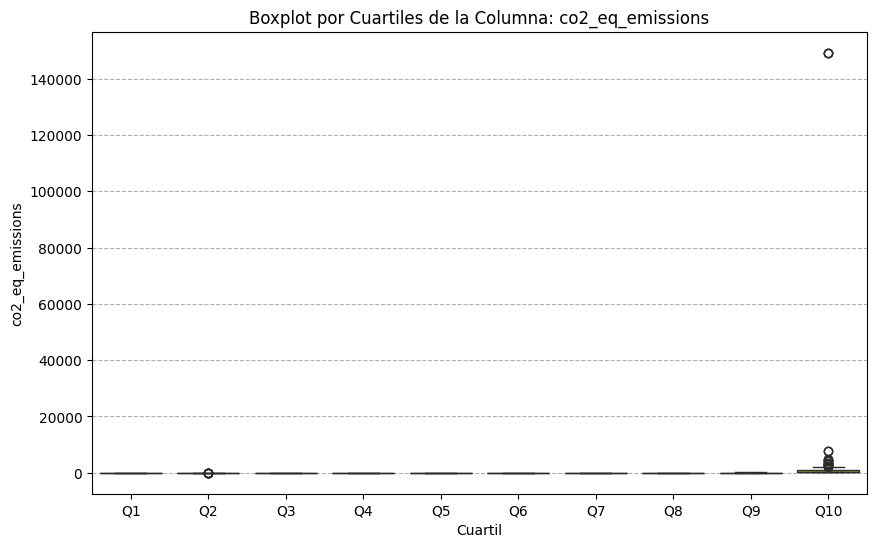

In [55]:
create_quartiles_and_boxplot(df3, 'co2_eq_emissions')